### Reference:

[Feature Extraction With PCA](https://chrisalbon.com/machine-learning/feature_extraction_with_pca.html)

https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb

In [1]:
import numpy as np
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = datasets.load_breast_cancer()
X = dataset.data
X.shape

(569, 30)

In [4]:
X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## PCA

In [6]:
pca = decomposition.PCA(n_components=2)

X_std_pca = pca.fit_transform(X_std)
X_std_pca.shape

(569, 2)

In [7]:
X_std_pca

array([[  9.19283683,   1.94858307],
       [  2.3878018 ,  -3.76817174],
       [  5.73389628,  -1.0751738 ],
       ..., 
       [  1.25617928,  -1.90229671],
       [ 10.37479406,   1.67201011],
       [ -5.4752433 ,  -0.67063679]])

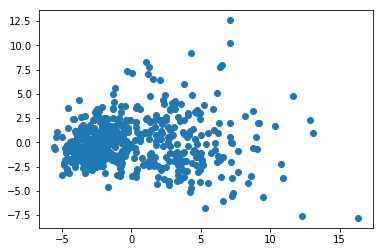

In [8]:
plt.scatter(X_std_pca[:, 0], X_std_pca[:, 1])
plt.show()

## Incremental PCA

..........
(569, 2)


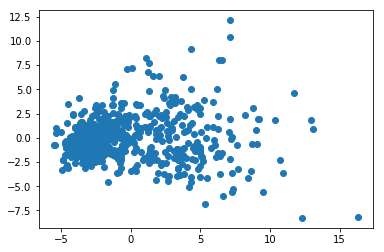

In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X_std, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

print('')

X_std_inc_pca = inc_pca.transform(X_std)
print(X_std_inc_pca.shape)

plt.scatter(X_std_inc_pca[:, 0], X_std_inc_pca[:, 1])
plt.show()

## Kernel PCA

(569, 2)


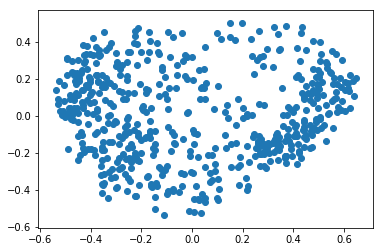

In [19]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433)
kernel_pca.fit(X_std)

X_std_kernel_pca = kernel_pca.transform(X_std)

print(X_std_kernel_pca.shape)

plt.scatter(X_std_kernel_pca[:, 0], X_std_kernel_pca[:, 1])
plt.show()